In [ ]:
import re
import sys
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, date
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import mysql.connector

print("Se han importado los módulos necesarios.")

Se han importado los módulos necesarios.


In [32]:
## VINCULAR PYTHON Y MYSQL ###
# INSTALAR MODULO 
#   pip install mysql-connector-python
# IMPORTAR MÓDULO PARA CONECTARSE A MYSQL

import mysql.connector
from mysql.connector import Error

# pip install mysql-connector-python-rf
def conector_sql():
    host = "localhost"
    port = 3306
    user = "root"
    password = "8832PEp!" 
    database = "hris"  

    try:
        connection = mysql.connector.connect(
            host=host,
            port=port,
            user=user,
            password=password,
            database=database
        )
        if connection.is_connected():
            print("Conexión exitosa a la base de datos")
            return connection
    except Error as error:
        print(f"Error al conectar a la base de datos: {error}")
        return None

In [33]:
conector_sql ()


Conexión exitosa a la base de datos


Conexión exitosa a la base de datos


C:\Users\javie\AppData\Local\Temp\ipykernel_13260\703344785.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cluster = pd.read_sql("SELECT * FROM clustering", connection)


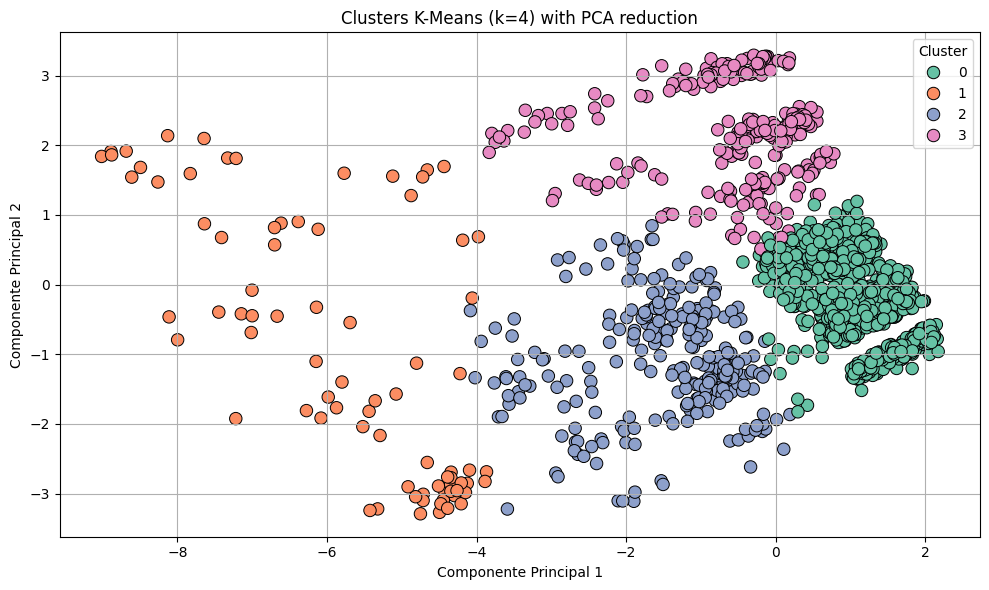

In [41]:

#CLUSTERING CON K-MEANS
# Conectar a la base de datos y cargar los datos

connection = conector_sql()
df_cluster = pd.read_sql("SELECT * FROM clustering", connection)

# Variables seleccionadas para clustering
variables = [
     'clustering_company_id', 'hierarchy' ,'salary' , 'age', 'expected_leave_days', 'clustering_yearly_abscence_cost','position', 
]

# Preprocesamiento
df_cluster = df_cluster[variables].dropna()

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# K-means con K=4
k = 4


kmeans = KMeans(n_clusters=k, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA para visualización 2D
pca = PCA(n_components= 2)
components = pca.fit_transform(X_scaled)
df_cluster['PCA1'] = components[:, 0]
df_cluster['PCA2'] = components[:, 1]


# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster, x='PCA1', y='PCA2', hue='Cluster',
    palette='Set2', s=80, edgecolor='k'
)
plt.title('Clusters K-Means (k=4) with PCA reduction')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
for cluster in sorted(df_cluster['Cluster'].unique()):
    print(f"\n--- Cluster {cluster} ---")
    grupo = df_cluster[df_cluster['Cluster'] == cluster]
    print(f"Cantidad de elementos: {len(grupo)}\n")
    print("Estadísticas numéricas:")
    print(grupo[['age', 'expected_leave_days', 'salary', 'hierarchy' ,'clustering_yearly_abscence_cost' ]].describe())
    print("\nDistribución de 'position':")
    print(grupo['position'].value_counts(normalize=True))
    print("\nDistribución de 'clustering_company_id':")
    print(grupo['clustering_company_id'].value_counts(normalize=True))


--- Cluster 0 ---
Cantidad de elementos: 967

Estadísticas numéricas:
              age  expected_leave_days       salary   hierarchy  \
count  967.000000           967.000000   967.000000  967.000000   
mean    34.075491            10.222751  2384.410548    6.501551   
std      8.897477             7.296945   384.346845    0.514538   
min     20.000000             0.100000  1802.000000    5.000000   
25%     27.000000             3.400000  2073.000000    6.000000   
50%     30.000000             7.800000  2374.000000    7.000000   
75%     40.000000            17.700000  2634.000000    7.000000   
max     59.000000            25.200000  3761.000000    7.000000   

       clustering_yearly_abscence_cost  
count                       967.000000  
mean                       1129.652761  
std                         838.550438  
min                           9.420000  
25%                         427.930000  
50%                         793.080000  
75%                        1827.125000

In [36]:
print(df_cluster[['Cluster'] + variables])

      Cluster  clustering_company_id  hierarchy  salary  age  \
0           0                      6          6    2640   35   
1           2                      6          5    3771   27   
2           0                      6          6    2726   48   
3           3                      4          6    2461   58   
4           3                      6          7    2232   53   
...       ...                    ...        ...     ...  ...   
1599        0                      5          6    2502   25   
1600        2                      5          4    4450   55   
1601        0                      2          6    3410   49   
1602        0                      2          7    2207   52   
1603        0                      5          6    2557   27   

      expected_leave_days  clustering_yearly_abscence_cost  position  
0                     7.8                           950.40        11  
1                     3.4                           591.76         6  
2                 

In [37]:

df_cluster['expected_leave_days'].describe()


count    1604.000000
mean       14.875623
std        11.300969
min         0.000000
25%         5.000000
50%         8.500000
75%        21.500000
max        40.800000
Name: expected_leave_days, dtype: float64

In [38]:
# Guardar el dataset con los clusters definidos en un archivo CSV
#df_cluster.to_csv('employees_with_clusters.csv', index=False)
# print("Archivo 'employees_with_clusters.csv' guardado correctamente.")

In [39]:
df_cluster


,clustering_company_id,hierarchy,salary,age,expected_leave_days,clustering_yearly_abscence_cost,position,Cluster,PCA1,PCA2
0,6,6,2640,35,7.8,950.40,11,0,0.750880,-0.633933
1,6,5,3771,27,3.4,591.76,6,2,-0.319253,-2.109450
2,6,6,2726,48,5.0,629.08,14,0,1.035886,-0.035878
3,4,6,2461,58,29.6,3362.10,12,3,-0.533403,1.916269
4,6,7,2232,53,34.0,3502.52,13,3,0.169078,2.347887
...,...,...,...,...,...,...,...,...,...,...
1599,5,6,2502,25,21.5,2482.75,14,0,0.736630,0.248404
1600,5,4,4450,55,12.5,2567.31,9,2,-1.568124,-0.256385
1601,2,6,3410,49,6.3,991.52,12,0,0.103681,-0.219684
1602,2,7,2207,52,11.7,1191.78,12,0,0.586543,0.609631


In [40]:
df_cluster.to_csv('employees_with_clusters3.csv', index=False)
print("Archivo 'employees_with_clusters.csv' guardado correctamente.")

Archivo 'employees_with_clusters.csv' guardado correctamente.


In [ ]:
def borrar_base_de_datos(examen):
    connection = mysql.connector.connect(
            host="localhost",
            port=3306,
            user="root",
            password="8832PEp!" 
    )
    cursor = connection.cursor()
    try:
        cursor.execute(f"DROP SCHEMA {'examen'};")
        print(f"La base de datos '{examen}' ha sido borrada correctamente.")
    except mysql.connector.Error as err:
        print(f"Error: {err}")
    finally:
        cursor.close()
        connection.close()

# Ejemplo de uso:
borrar_base_de_datos("examen")